<a href="https://colab.research.google.com/github/FalaWill/FalaWill/blob/main/BDA601_A2_M8_de_Jesus_W.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **BDA601—Big Data and Analytics - Visualisation and Model**
```



**1. Problem Statement**

When clients discontinue doing business with a company,this is known as customer churn or customer attrition. Because the cost of obtaining a new client is usually higher than keeping an existing one, businesses are interested in identifying segments of these customers. 
To evaluate it, I will use the Telco Customer Churn dataset to develop a simple customer churn prediction model. To represent churned consumers, I used a decision tree, pandas for data crunching, and matplotlib for visualisations. 


**2. Exploratory Data Analysis**

To learn more about the dataset, I will conduct a visual and statistical exploratory investigation in this part.





In [ ]:
# first, import the required libraries for Python
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.image as pltimg



In [ ]:
# Loading the data file Once the data file has been uploaded
df = pd.read_csv("/content/sample_data/BDA601_Assessment 2_Telco-Customer-Churn_downloaded 05082020.csv", header=None)

**NOTE:** No Missing Values according to False values attributed in the columns 

In [ ]:
# counting the number of rows in the full dataset
len(df) 

7043

In [ ]:
# checking types and information of attributes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7043 non-null   object
 1   1       7043 non-null   object
 2   2       7043 non-null   int64 
 3   3       7043 non-null   object
 4   4       7043 non-null   int64 
 5   5       7043 non-null   object
 6   6       7043 non-null   object
 7   7       7043 non-null   object
 8   8       7043 non-null   object
 9   9       7043 non-null   object
 10  10      7043 non-null   object
 11  11      7043 non-null   object
 12  12      7043 non-null   object
 13  13      7043 non-null   object
 14  14      7043 non-null   object
 15  15      7043 non-null   object
dtypes: int64(2), object(14)
memory usage: 880.5+ KB


In [ ]:
# checking for missing values
df.isnull()


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# print the first 5 rows
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,0,0,1,0,No phone service,Yes,No,No,No,Month-to-month,1,Electronic check,29.85,0
1,1,0,0,34,1,No,No,Yes,No,No,One year,0,Mailed check,1889.50,0
2,1,0,0,2,1,No,Yes,No,No,No,Month-to-month,1,Mailed check,108.15,1
3,1,0,0,45,0,No phone service,No,Yes,Yes,No,One year,0,Bank transfer (automatic),1840.75,0
4,0,0,0,2,1,No,No,No,No,No,Month-to-month,1,Electronic check,151.65,1


**3. Data Cleaning and Feature Selections**

To perform data pre-processing and feature selection for the model, which I will build in the next section.

In [ ]:
# change the column number to column names
df.columns = ['customerID',
              'gender',
              'SeniorCitizen',
              'Dependents', 
              'tenure',
              'PhoneService',
              'MultipleLines',
              'OnlineBackup',
              'DeviceProtection',
              'TechSupport',
              'StreamingMovies',
              'Contract',
              'PaperlessBilling',
              'PaymentMethod',
              'TotalCharges',
              'Churn' ]
# print the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,No,1,No,No phone service,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,34,Yes,No,No,Yes,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,0,No,2,Yes,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,0,No,45,No,No phone service,No,Yes,Yes,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,0,No,2,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [ ]:
# identifying the data type for each column
df.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

In [ ]:
#I am changing Churn to 1 and 0 for analysis purpose
df['Churn']=df['Churn'].replace('No',0)
df['Churn']=df['Churn'].replace('Yes',1)

In [ ]:
df['gender']=df['gender'].replace('Male',1)
df['gender']=df['gender'].replace('Female',0)


In [ ]:
df['PhoneService']=df['PhoneService'].replace('No',0)
df['PhoneService']=df['PhoneService'].replace('Yes',1)

In [ ]:
df['Dependents']=df['Dependents'].replace('No',0)
df['Dependents']=df['Dependents'].replace('Yes',1)

In [ ]:
df['PaperlessBilling']=df['PaperlessBilling'].replace('No',0)
df['PaperlessBilling']=df['PaperlessBilling'].replace('Yes',1)

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
df.TotalCharges.isnull().sum()

11

In [ ]:
df.head()


,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,0,0,0,1,0,No phone service,Yes,No,No,No,Month-to-month,1,Electronic check,29.85,0
1,5575-GNVDE,1,0,0,34,1,No,No,Yes,No,No,One year,0,Mailed check,1889.50,0
2,3668-QPYBK,1,0,0,2,1,No,Yes,No,No,No,Month-to-month,1,Mailed check,108.15,1
3,7795-CFOCW,1,0,0,45,0,No phone service,No,Yes,Yes,No,One year,0,Bank transfer (automatic),1840.75,0
4,9237-HQITU,0,0,0,2,1,No,No,No,No,No,Month-to-month,1,Electronic check,151.65,1


In [ ]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
#Defining categorical variables
categorical_features=df.select_dtypes(include=[object])

In [ ]:
categorical_features.columns

Index(['customerID', 'MultipleLines', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingMovies', 'Contract', 'PaymentMethod'],
      dtype='object')

In [ ]:
# Removing unwanted coloumns
df.drop(['customerID'],axis=1,inplace=True)

In [ ]:
df.TotalCharges.isnull().sum()

11

In [ ]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
# One Hot Encoding by ceating dummies
from sklearn.preprocessing import OneHotEncoder

In [ ]:
oe=OneHotEncoder()

In [ ]:
final_df=pd.get_dummies(columns=['MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'],data=df)

In [ ]:
final_df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,29.85,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,1,0,0,34,1,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,1,0,0,2,1,108.15,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,1,0,0,45,0,1840.75,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,0,0,0,2,1,151.65,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


**Classification -**
The next section will split the data in two parts:
1. The columns(X) of data that will be used to make classifications

2. The column (y) of data which will predict (Churn)

In [ ]:
y=final_df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
# a new copy of the columns used to classify
X = final_df.drop(['Churn' ] , axis=1).copy()
X.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,29.85,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,1,0,0,34,1,1889.50,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,1,0,0,2,1,108.15,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,1,0,0,45,0,1840.75,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,0,0,0,2,1,151.65,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [ ]:
df.dtypes

gender                int64
SeniorCitizen         int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
final_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
OnlineBackup_No                              uint8
OnlineBackup_No internet service             uint8
OnlineBackup_Yes                             uint8
DeviceProtection_No                          uint8
DeviceProtection_No internet service         uint8
DeviceProtection_Yes                         uint8
TechSupport_No                               uint8
TechSupport_No internet service              uint8
TechSupport_Yes                              uint8
StreamingMovies_No             

**4. Model Building**

In this section, I will use the pre-processed data and the selected features to build a ‘decision-tree’ model to predict customer churn. Since the data are correctly formated, the next step will split the data into training and testing sets and build the tree.


**Build a Preliminary Classification Tree**

# **A Decision-Tree model to predict customer churn**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

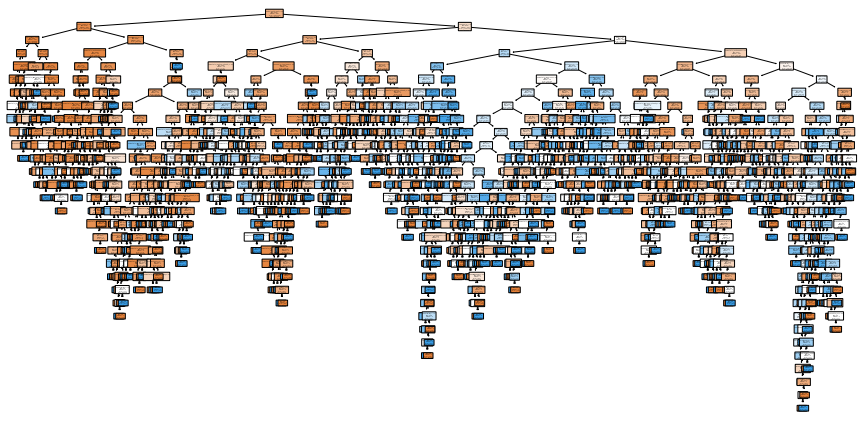

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No Churn","Yes Churn"],
          feature_names=X.columns);

In [ ]:
# I have to separate the feature columns from the target column. 
# The feature columns are the columns that we try to predict from most important attributes. 
# the target column (Churn) is the column with the values we try to predict.

features = ['TotalCharges', 'tenure', 'Contract', 'gender']

X = df[features]
y = df['Churn']

print(X)
print(y)

      TotalCharges  tenure        Contract  gender
0            29.85       1  Month-to-month       0
1          1889.50      34        One year       1
2           108.15       2  Month-to-month       1
3          1840.75      45        One year       1
4           151.65       2  Month-to-month       0
...            ...     ...             ...     ...
7038       1990.50      24        One year       1
7039       7362.90      72        One year       0
7040        346.45      11  Month-to-month       0
7041        306.60       4  Month-to-month       1
7042       6844.50      66        Two year       1

[7043 rows x 4 columns]
0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [ ]:
from sklearn import tree
import pydotplus


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.375024 to fit



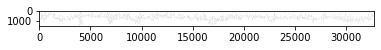

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

# **Format Final Results**

In [ ]:
# Predict the Test set results
final_results = pd.concat([X_test, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['Churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

      Churn  predictions  propensity_to_churn(%) Ranking
2200      0            0                   15.59       6
4627      0            0                   13.16       6
3225      0            1                   64.73       2
2828      0            0                    9.51       7
3768      0            0                   14.39       6
...     ...          ...                     ...     ...
2631      1            1                   83.56       1
5333      1            0                   48.89       3
6972      1            0                   30.06       4
4598      0            0                   29.23       4
3065      0            1                   50.86       3

[1409 rows x 4 columns]


# **Future Predictions**

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(X_train,y_train)

0.7997870074547391

In [ ]:
lr_predict=lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn import metrics

In [ ]:
cm=confusion_matrix(y_test,lr_predict)

In [ ]:
cm

array([[926, 115],
       [190, 178]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=1000,max_depth=100,oob_score=True,random_state=42)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rf_predict=rf.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test,rf_predict)

array([[903, 138],
       [213, 155]])

In [ ]:
import pandas as pd
feature_importances1 = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
# the most important attributes that lead to churning
feature_importances1

,importance
TotalCharges,0.273119
tenure,0.205125
Contract_Month-to-month,0.064039
gender,0.038229
TechSupport_No,0.032472
PaymentMethod_Electronic check,0.031865
Contract_Two year,0.029192
Dependents,0.028490
SeniorCitizen,0.026327
OnlineBackup_No,0.021474


In [ ]:
# Machine Learning Algorithm Evaluation
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1282
           1       0.58      0.43      0.49       479

    accuracy                           0.76      1761
   macro avg       0.69      0.66      0.67      1761
weighted avg       0.74      0.76      0.75      1761

0.7603634298693924


# **Visualize results on a Confusion Matrix:** # 
The Confusion matrix indicates that we have 178+926 correct predictions and 190+115 incorrect predictions.


[[926 115]
 [190 178]]
Test Data Accuracy: 0.7835


<Figure size 2016x1440 with 0 Axes>

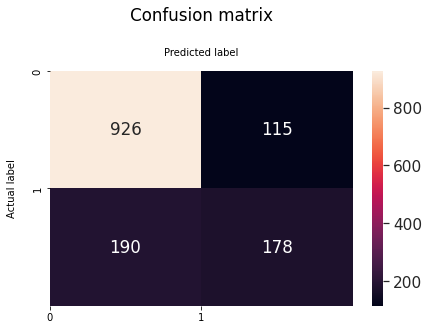

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score 
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),
rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


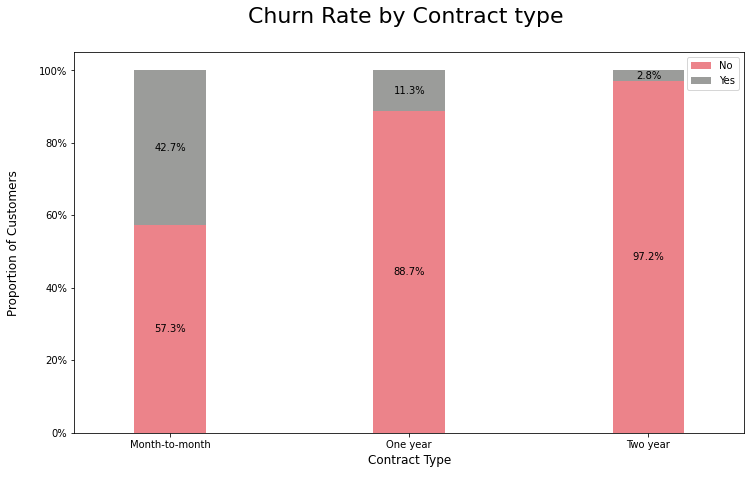

In [ ]:

import matplotlib.ticker as mtick
contract_churn = df.groupby(
['Contract','Churn']).size().unstack()
contract_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)